<a href="https://colab.research.google.com/github/pavelkochkin1/policy-prolongation-mindset/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages importing 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="whitegrid", palette='Dark2')

# Data loading

In [ ]:
data = pd.read_csv('data/data.txt', sep=';', index_col='POLICY_ID').drop('DATA_TYPE', axis=1)
data.head()

,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
POLICY_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
2,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
3,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
4,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
5,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96605 entries, 1 to 96605
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POLICY_BEGIN_MONTH             96605 non-null  int64  
 1   POLICY_END_MONTH               96605 non-null  int64  
 2   POLICY_IS_RENEWED              96605 non-null  int64  
 3   POLICY_SALES_CHANNEL           96605 non-null  int64  
 4   POLICY_SALES_CHANNEL_GROUP     96605 non-null  int64  
 5   POLICY_BRANCH                  96605 non-null  object 
 6   POLICY_MIN_AGE                 96605 non-null  int64  
 7   POLICY_MIN_DRIVING_EXPERIENCE  96605 non-null  int64  
 8   VEHICLE_MAKE                   96605 non-null  object 
 9   VEHICLE_MODEL                  96605 non-null  object 
 10  VEHICLE_ENGINE_POWER           96605 non-null  float64
 11  VEHICLE_IN_CREDIT              96605 non-null  int64  
 12  VEHICLE_SUM_INSURED            96605 non-null 

In [ ]:
cat_cols = []
num_cols = []

# Features

### POLICY_BEGIN_MONTH	

In [ ]:
np.unique(data['POLICY_BEGIN_MONTH'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
data['POLICY_BEGIN_MONTH'].value_counts()

8     14426
12    10475
4      9736
3      9282
10     8100
11     8048
9      6888
2      6525
5      6201
7      6141
6      5700
1      5083
Name: POLICY_BEGIN_MONTH, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


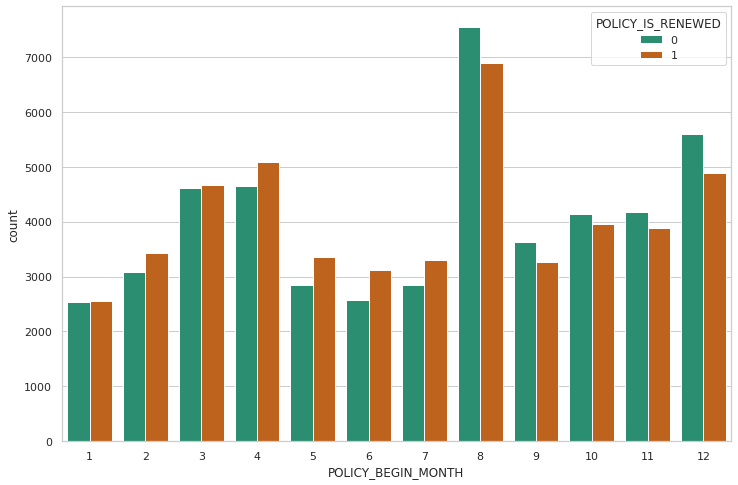

In [ ]:
sns.countplot(data['POLICY_BEGIN_MONTH'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('POLICY_BEGIN_MONTH')

### POLICY_END_MONTH

In [ ]:
np.unique(data['POLICY_END_MONTH'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
cat_cols.append('POLICY_END_MONTH')

### POLICY_SALES_CHANNEL

In [ ]:
np.unique(data['POLICY_SALES_CHANNEL'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

-> category feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


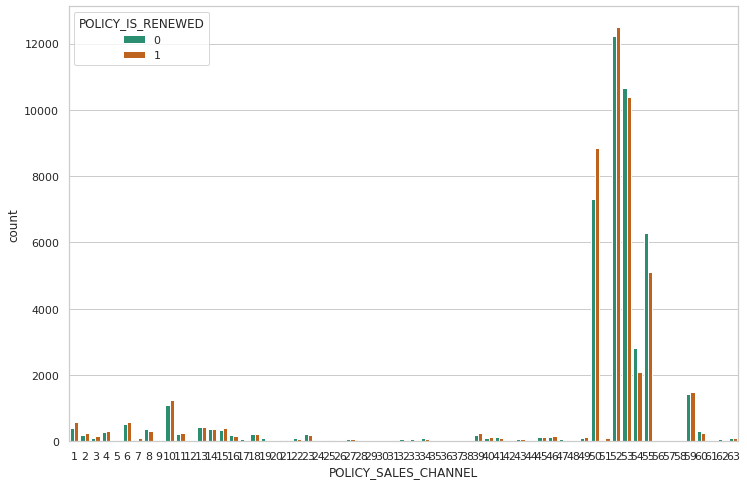

In [ ]:
sns.countplot(data['POLICY_SALES_CHANNEL'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('POLICY_SALES_CHANNEL')

### POLICY_SALES_CHANNEL_GROUP

In [ ]:
np.unique(data['POLICY_SALES_CHANNEL_GROUP'])

array([1, 2, 3, 4, 5, 6, 7, 8])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


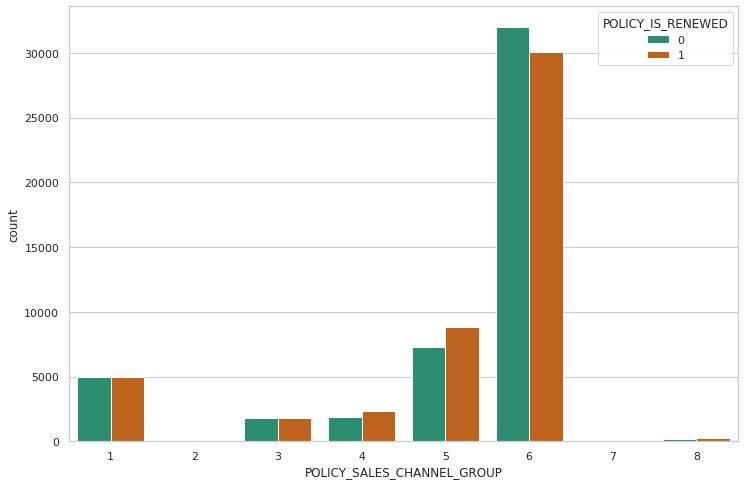

In [ ]:
sns.countplot(data['POLICY_SALES_CHANNEL_GROUP'], hue=data['POLICY_IS_RENEWED'])

-> category feature

In [ ]:
cat_cols.append('POLICY_SALES_CHANNEL_GROUP')

### POLICY_BRANCH

In [ ]:
np.unique(data['POLICY_BRANCH'])

array(['Москва', 'Санкт-Петербург'], dtype=object)

-> category feature

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


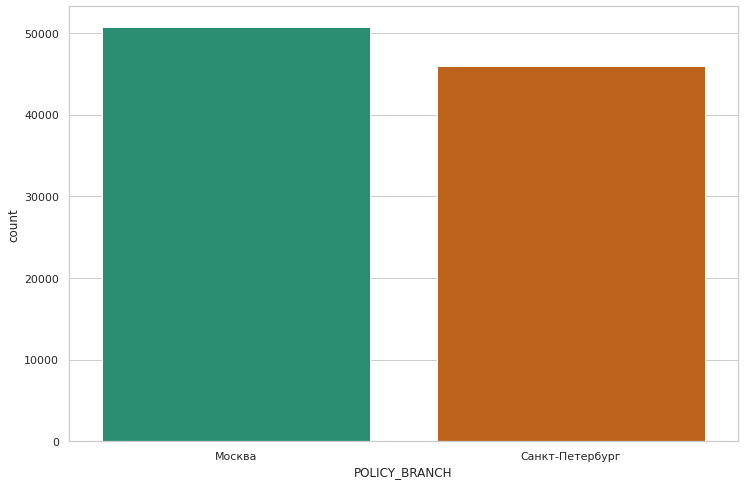

In [ ]:
sns.countplot(data['POLICY_BRANCH'])

In [ ]:
data['POLICY_BRANCH'] = data['POLICY_BRANCH'].replace({'Москва':1, 'Санкт-Петербург':0}).astype(int)

In [ ]:
cat_cols.append('POLICY_BRANCH')

### POLICY_MIN_AGE

In [ ]:
np.unique(data['POLICY_MIN_AGE'])

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86])

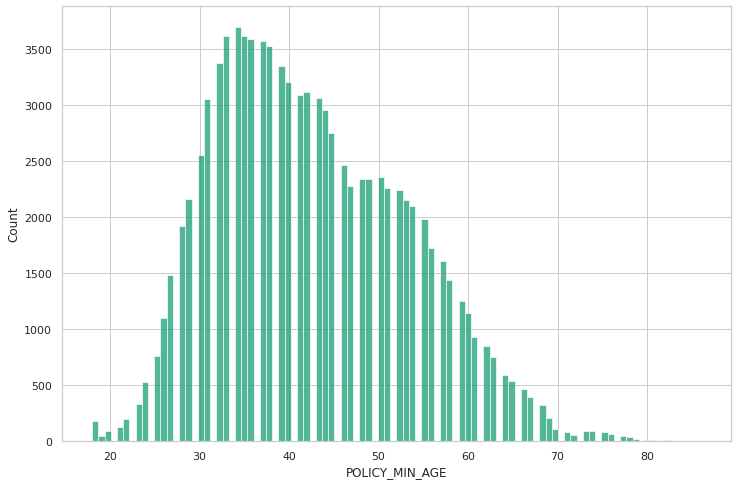

In [ ]:
sns.histplot(data['POLICY_MIN_AGE'])

In [ ]:
num_cols.append('POLICY_MIN_AGE')

### POLICY_MIN_DRIVING_EXPERIENCE

In [ ]:
np.unique(data['POLICY_MIN_DRIVING_EXPERIENCE'])

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   60, 1956, 1958, 1962, 1963, 1965, 1968,
       1969, 1970, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])

We see that some samples have experience relative to the year, and not absolute

In [ ]:
data[data['POLICY_MIN_DRIVING_EXPERIENCE'] > 1900].shape

(992, 28)

In [ ]:
# solution
data.loc[data['POLICY_MIN_DRIVING_EXPERIENCE'] > 1900, 'POLICY_MIN_DRIVING_EXPERIENCE'] -= 2015
data.loc[data['POLICY_MIN_DRIVING_EXPERIENCE'] < 0, 'POLICY_MIN_DRIVING_EXPERIENCE'] *= -1

In [ ]:
# check 
np.unique(data['POLICY_MIN_DRIVING_EXPERIENCE'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
num_cols.append('POLICY_MIN_DRIVING_EXPERIENCE')

### VEHICLE_MAKE

In [ ]:
np.unique(data['VEHICLE_MAKE'])

array(['<Пусто>', 'Acura', 'Alfa Romeo', 'Audi', 'BMW', 'BYD', 'Bentley',
       'Bogdan', 'Brilliance', 'Cadillac', 'Changan', 'Chery',
       'Chevrolet', 'Chrysler', 'Citroen', 'DAF', 'Daewoo', 'Daihatsu',
       'Datsun', 'Dodge', 'Faw', 'Ferrari', 'Fiat', 'Ford', 'Geely',
       'Great Wall', 'Hafei', 'Haima', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Iveco', 'Jaguar', 'Jcb', 'Jeep', 'Kia', 'Kogel',
       'Krone', 'Lada', 'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'MAN',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rolls-Royce',
       'Rover', 'Saab', 'Scania', 'Scion', 'Seat', 'Skoda', 'Smart',
       'Ssang Yong', 'Subaru', 'Suzuki', 'Tagaz', 'Toyota', 'Volkswagen',
       'Volvo', 'Vortex', 'Wielton', 'ВАЗ', 'ГАЗ',
       'Другая марка (Иностранного производства)',
       'Другая марка (Отечественного производства)', 'ИЖ', 'ИПВ', 'КАМАЗ',
       'Купава', 'МАЗ', 'ПАЗ', 'УАЗ'], dtype=objec

In [ ]:
# mask = data['VEHICLE_MAKE'].value_counts()
# data = data[data['VEHICLE_MAKE'].isin(mask.index[mask>25])]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


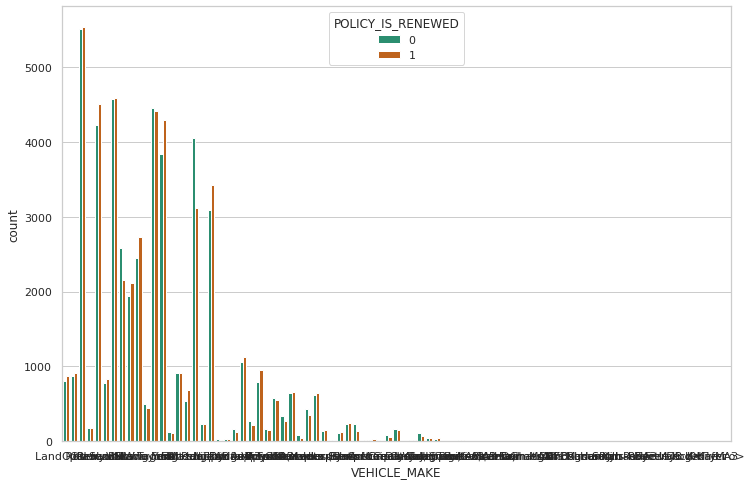

In [ ]:
sns.countplot(data['VEHICLE_MAKE'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
#cat_cols.append('VEHICLE_MAKE')
data.drop('VEHICLE_MAKE', axis=1, inplace=True)

### VEHICLE_MODEL

In [ ]:
data['VEHICLE_MODEL'].value_counts()

RAV4              4186
Sportage          3692
Duster            3612
Focus             3196
ix35              2971
                  ... 
<Пусто>              1
Continental GT       1
Commander            1
Magentis             1
11183 Kalina         1
Name: VEHICLE_MODEL, Length: 549, dtype: int64

In [ ]:
data.drop('VEHICLE_MODEL', axis=1, inplace=True)

### VEHICLE_ENGINE_POWER

In [ ]:
data['VEHICLE_ENGINE_POWER'].value_counts()

150.0    12176
140.0     4327
123.0     3590
105.0     3577
146.0     3179
         ...  
254.0        1
351.0        1
530.0        1
344.0        1
285.0        1
Name: VEHICLE_ENGINE_POWER, Length: 347, dtype: int64

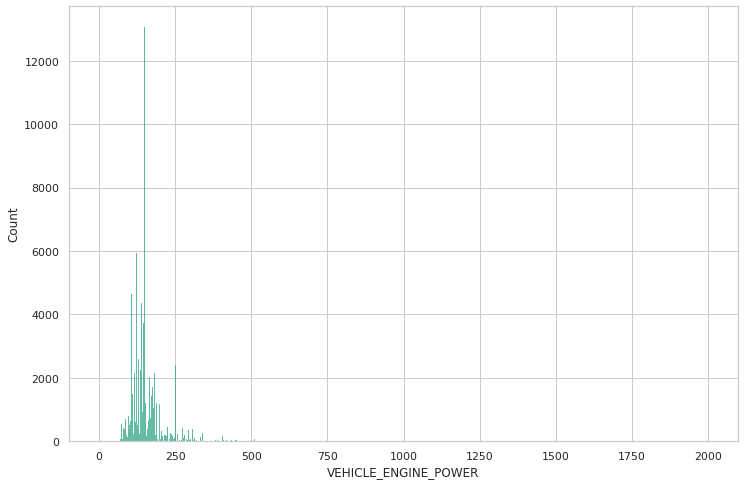

In [ ]:
sns.histplot(data['VEHICLE_ENGINE_POWER'])

In [ ]:
low = .03
high = .98
quant_df = data['VEHICLE_ENGINE_POWER'].quantile([low, high])
print(quant_df)

0.03     84.0
0.98    306.0
Name: VEHICLE_ENGINE_POWER, dtype: float64


In [ ]:
data.shape

(96605, 26)

In [ ]:
data = data[(data['VEHICLE_ENGINE_POWER'] > 80) & (data['VEHICLE_ENGINE_POWER'] < 255)]
data.shape

(91144, 26)

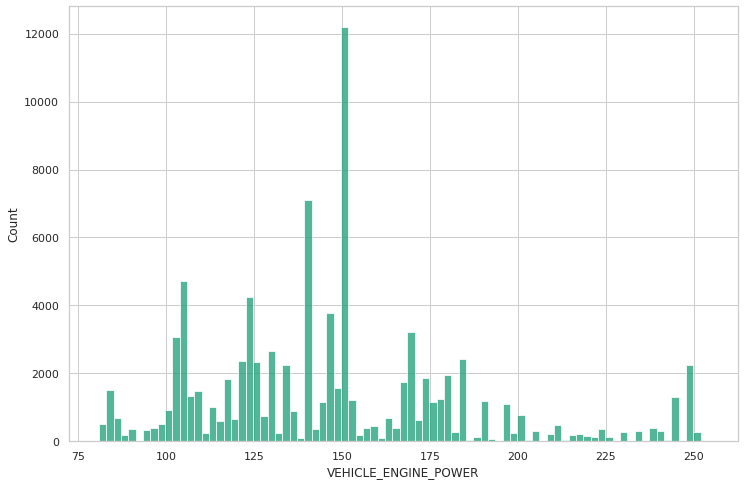

In [ ]:
sns.histplot(data['VEHICLE_ENGINE_POWER'])

In [ ]:
num_cols.append('VEHICLE_ENGINE_POWER')

### VEHICLE_IN_CREDIT

In [ ]:
np.unique(data['VEHICLE_IN_CREDIT'])

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


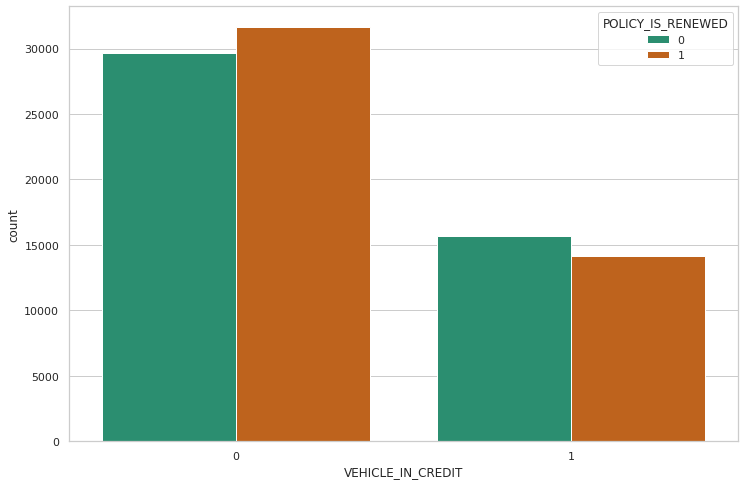

In [ ]:
sns.countplot(data['VEHICLE_IN_CREDIT'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('VEHICLE_IN_CREDIT')

### VEHICLE_SUM_INSURED

In [ ]:
np.unique(data['VEHICLE_SUM_INSURED'])

array([      0.,  108491.,  112995., ..., 6483479., 7000388., 7006159.])

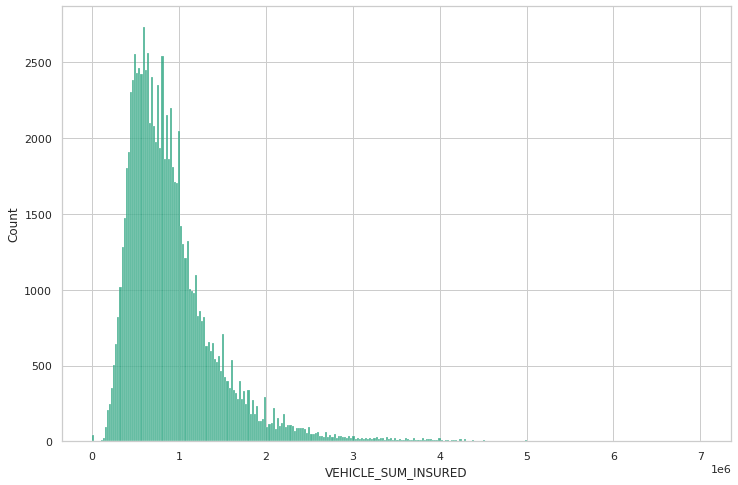

In [ ]:
sns.histplot(data['VEHICLE_SUM_INSURED'])

In [ ]:
low = .001
high = .99
quant_df = data['VEHICLE_SUM_INSURED'].quantile([low, high])
print(quant_df)

0.001     151656.915
0.990    2995228.000
Name: VEHICLE_SUM_INSURED, dtype: float64


In [ ]:
data.shape

(91144, 26)

In [ ]:
data = data[(data['VEHICLE_SUM_INSURED'] >  151656) & (data['VEHICLE_SUM_INSURED'] < 2995228)]
data.shape

(90140, 26)

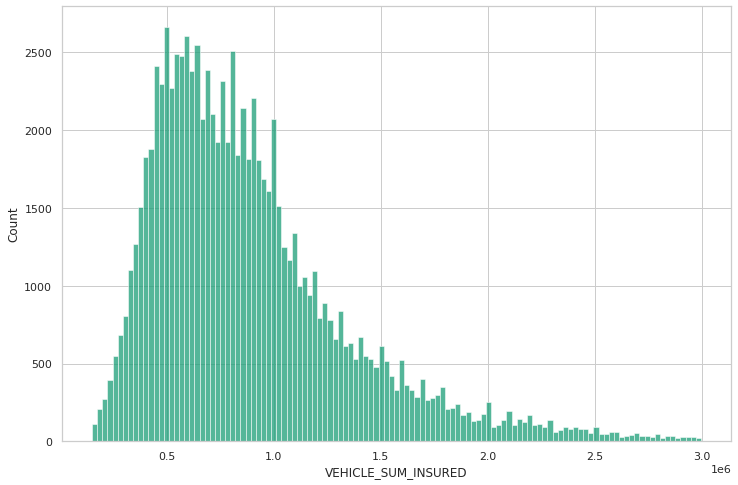

In [ ]:
sns.histplot(data['VEHICLE_SUM_INSURED'])

In [ ]:
num_cols.append('VEHICLE_SUM_INSURED')

### POLICY_INTERMEDIARY

In [ ]:
np.unique(data['POLICY_INTERMEDIARY'])

array(['1', '10', '100', ..., '998', '999', 'N'], dtype=object)

In [ ]:
data['POLICY_INTERMEDIARY'].value_counts()

N       19514
1096    10771
910      3439
1252     2294
326      1256
        ...  
350         1
356         1
12          1
470         1
667         1
Name: POLICY_INTERMEDIARY, Length: 1369, dtype: int64

I want to try remove this feature

In [ ]:
data.drop('POLICY_INTERMEDIARY', axis=1, inplace=True)

### INSURER_GENDER

In [ ]:
np.unique(data['INSURER_GENDER'])

array(['F', 'M'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


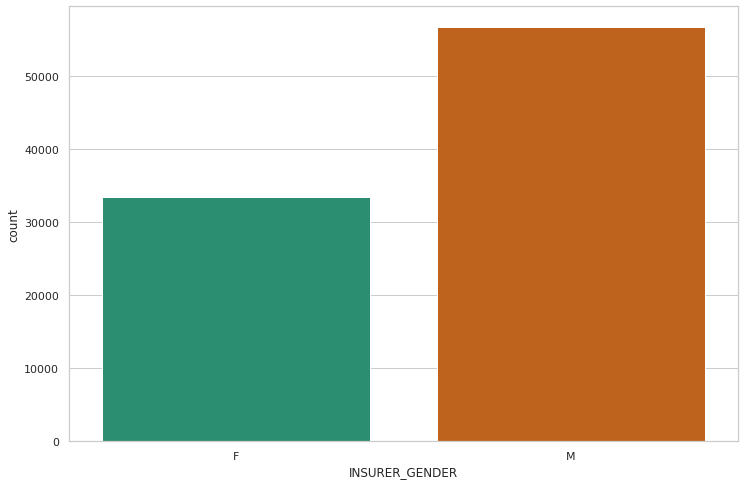

In [ ]:
sns.countplot(data['INSURER_GENDER'])

In [ ]:
data['INSURER_GENDER'] = data['INSURER_GENDER'].replace({'F':0, 'M':1})

In [ ]:
cat_cols.append('INSURER_GENDER')

### POLICY_CLM_N

In [ ]:
np.unique(data['POLICY_CLM_N'])

array(['0', '1L', '1S', '2', '3', '4+', 'n/d'], dtype=object)

In [ ]:
data['POLICY_CLM_N'].value_counts()

0      63806
1L      9390
1S      9187
2       5667
3       1533
4+       504
n/d       53
Name: POLICY_CLM_N, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


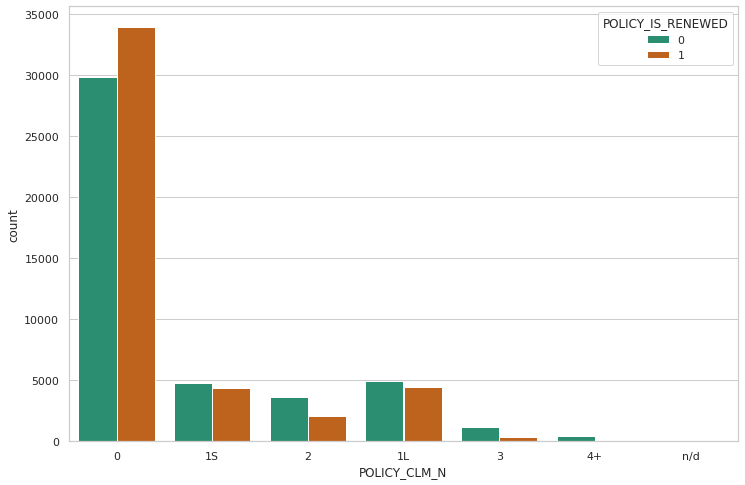

In [ ]:
sns.countplot(data['POLICY_CLM_N'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
data['POLICY_CLM_N'] = data['POLICY_CLM_N'].replace({'0':0, '1L':1, '1S':2, '2':3, '3':4, '4+':5, 'n/d':6})

In [ ]:
cat_cols.append('POLICY_CLM_N')

### POLICY_CLM_GLT_N

In [ ]:
np.unique(data['POLICY_CLM_GLT_N'])

array(['0', '1L', '1S', '2', '3', '4+', 'n/d'], dtype=object)

In [ ]:
data['POLICY_CLM_GLT_N'].value_counts()

0      67719
1S      9152
1L      7298
2       4490
3       1071
4+       357
n/d       53
Name: POLICY_CLM_GLT_N, dtype: int64

In [ ]:
data['POLICY_CLM_GLT_N'] = data['POLICY_CLM_GLT_N'].replace({'0':0, '1L':1, '1S':2, '2':3, '3':4, '4+':5, 'n/d':6})

In [ ]:
cat_cols.append('POLICY_CLM_GLT_N')

### POLICY_PRV_CLM_N

In [ ]:
np.unique(data['POLICY_PRV_CLM_N'])

array(['0', '1L', '1S', '2', '3', '4+', 'N'], dtype=object)

In [ ]:
data['POLICY_PRV_CLM_N'].value_counts()

0     41871
N     30768
1S     6711
1L     6435
2      3491
3       744
4+      120
Name: POLICY_PRV_CLM_N, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


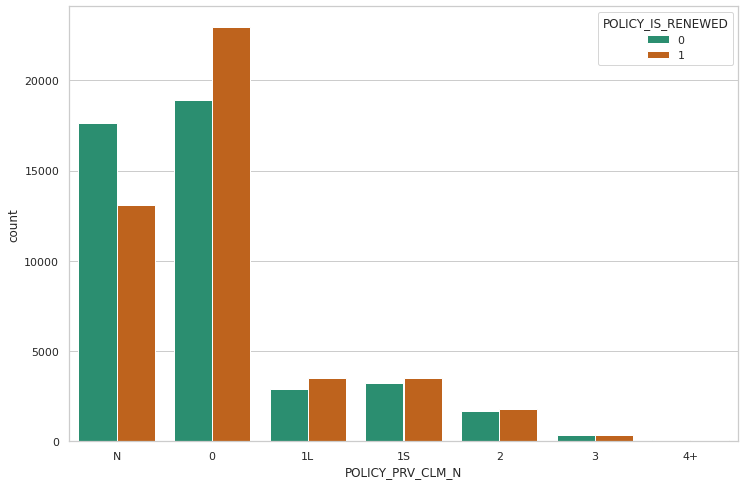

In [ ]:
sns.countplot(data['POLICY_PRV_CLM_N'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
data['POLICY_PRV_CLM_N'] = data['POLICY_PRV_CLM_N'].replace({'0':0, '1L':1, '1S':2, '2':3, '3':4, '4+':5, 'N':6})

In [ ]:
cat_cols.append('POLICY_PRV_CLM_N')

### POLICY_PRV_CLM_GLT_N

In [ ]:
np.unique(data['POLICY_PRV_CLM_GLT_N'])

array(['0', '1L', '1S', '2', '3', '4+', 'N'], dtype=object)

In [ ]:
data['POLICY_PRV_CLM_GLT_N'].value_counts()

0     45243
N     30768
1S     6758
1L     4601
2      2379
3       337
4+       54
Name: POLICY_PRV_CLM_GLT_N, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


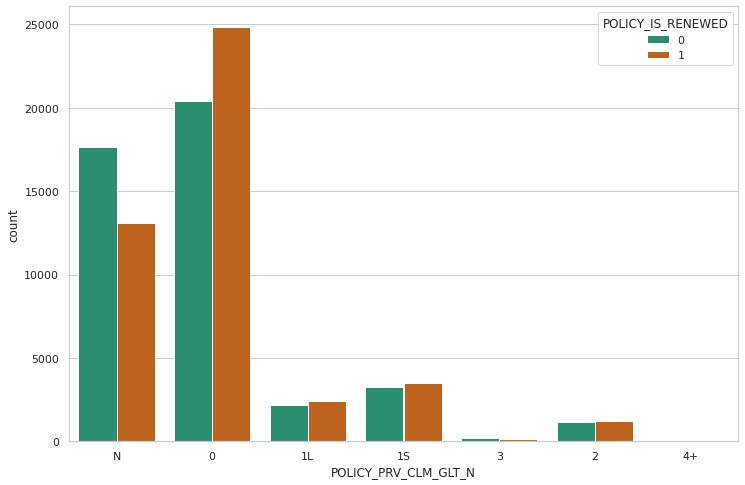

In [ ]:
sns.countplot(data['POLICY_PRV_CLM_GLT_N'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
data.drop('POLICY_PRV_CLM_GLT_N', axis=1, inplace=True)

### CLIENT_HAS_DAGO

In [ ]:
np.unique(data['CLIENT_HAS_DAGO'])

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


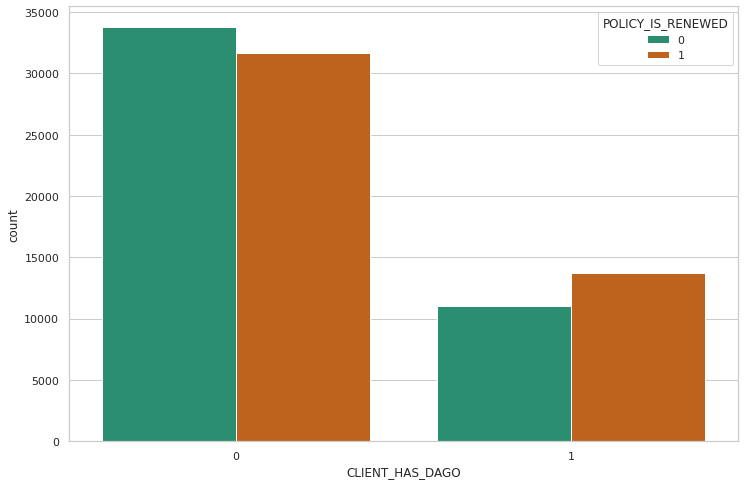

In [ ]:
sns.countplot(data['CLIENT_HAS_DAGO'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('CLIENT_HAS_DAGO')

### CLIENT_HAS_OSAGO

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


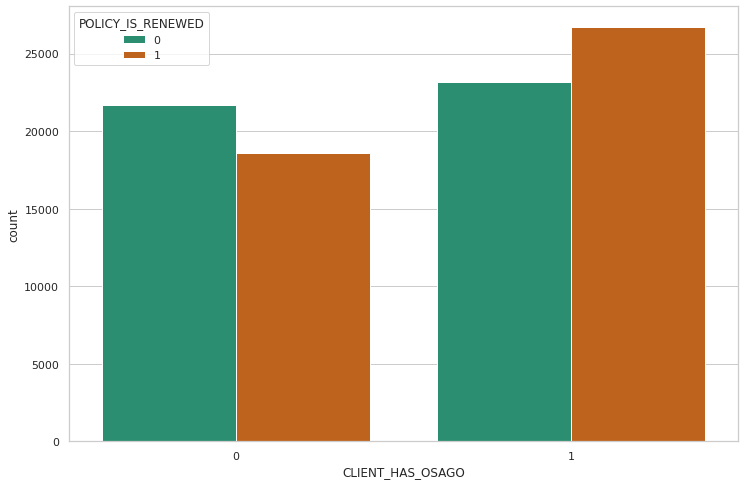

In [ ]:
sns.countplot(data['CLIENT_HAS_OSAGO'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('CLIENT_HAS_OSAGO')

### POLICY_COURT_SIGN

In [ ]:
np.unique(data['POLICY_COURT_SIGN'])

array([0, 1])

In [ ]:
data['POLICY_COURT_SIGN'].value_counts()

0    90059
1       81
Name: POLICY_COURT_SIGN, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


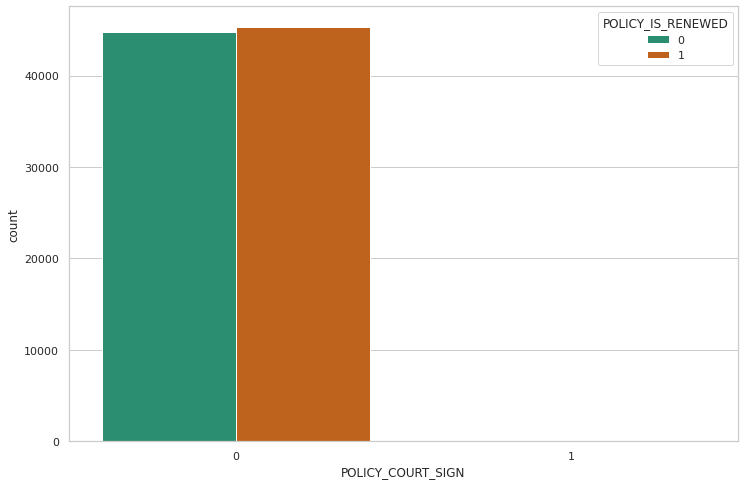

In [ ]:
sns.countplot(data['POLICY_COURT_SIGN'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
data.drop('POLICY_COURT_SIGN', inplace=True, axis=1)

### CLAIM_AVG_ACC_ST_PRD

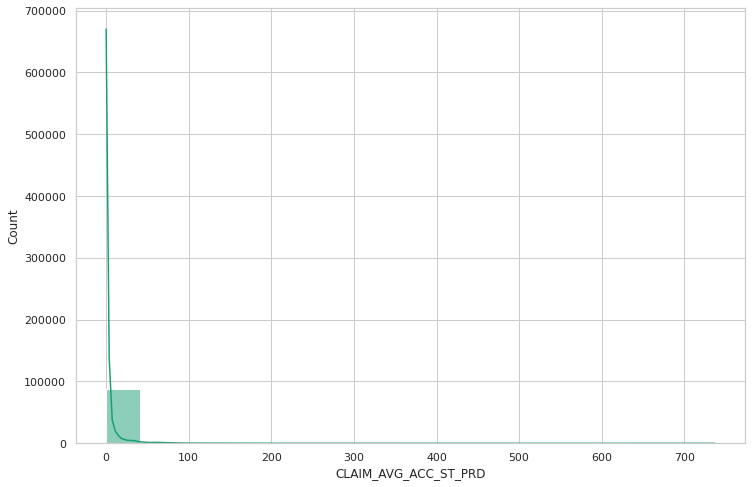

In [ ]:
sns.histplot(data['CLAIM_AVG_ACC_ST_PRD'], kde=True)

In [ ]:
data.drop('CLAIM_AVG_ACC_ST_PRD', inplace=True, axis=1)

### POLICY_HAS_COMPLAINTS

In [ ]:
np.unique(data['POLICY_HAS_COMPLAINTS'])

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


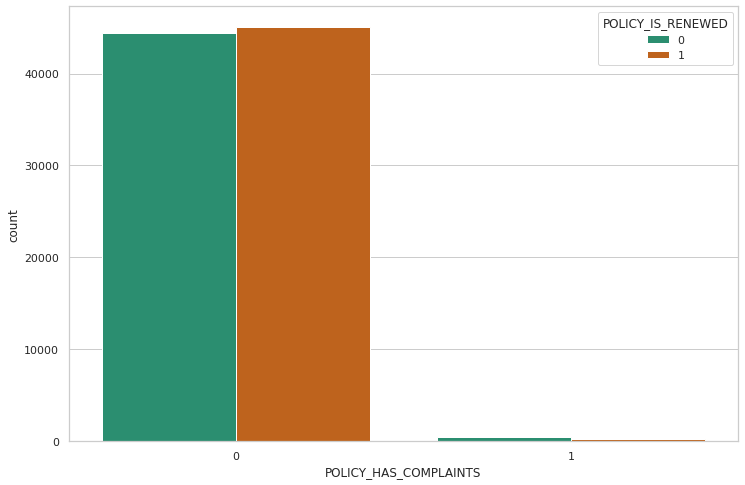

In [ ]:
sns.countplot(data['POLICY_HAS_COMPLAINTS'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
cat_cols.append('POLICY_HAS_COMPLAINTS')

### POLICY_YEARS_RENEWED_N

In [ ]:
np.unique(data['POLICY_YEARS_RENEWED_N'])

array(['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'N'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


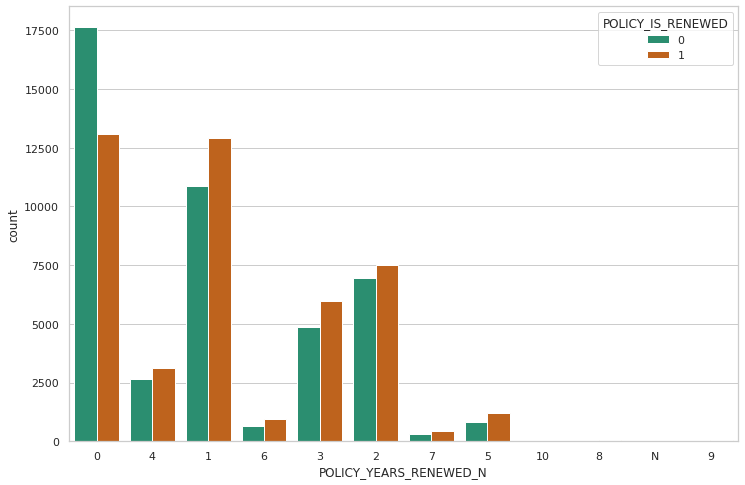

In [ ]:
sns.countplot(data['POLICY_YEARS_RENEWED_N'], hue=data['POLICY_IS_RENEWED'])

In [ ]:
data['POLICY_YEARS_RENEWED_N'] = data['POLICY_YEARS_RENEWED_N'].replace({'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6,
                                                                         '7':7, '8':8, '9':9, '10':10, 'N':11})

In [ ]:
cat_cols.append('POLICY_YEARS_RENEWED_N')

### POLICY_DEDUCT_VALUE

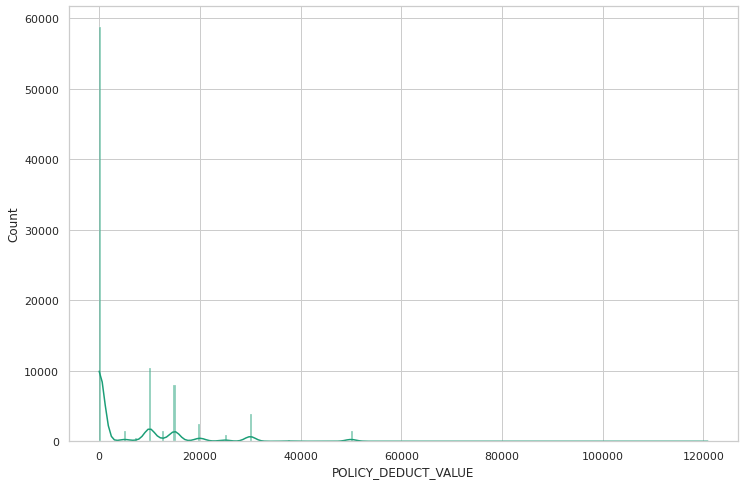

In [ ]:
sns.histplot(data['POLICY_DEDUCT_VALUE'], kde=True)

In [ ]:
num_cols.append('POLICY_DEDUCT_VALUE')

### CLIENT_REGISTRATION_REGION

In [ ]:
np.unique(data['CLIENT_REGISTRATION_REGION'])

array(['N', 'Адыгея', 'Алтай', 'Алтайский', 'Амурская', 'Архангельская',
       'Астраханская', 'Башкортостан', 'Белгородская', 'Брянская',
       'Бурятия', 'Владимирская', 'Волгоградская', 'Вологодская',
       'Воронежская', 'Дагестан', 'Забайкальский', 'Ивановская',
       'Ингушетия', 'Иркутская', 'Кабардино-Балкарская',
       'Калининградская', 'Калмыкия', 'Калужская', 'Камчатский',
       'Карачаево-Черкесская', 'Карелия', 'Кемеровская', 'Кировская',
       'Коми', 'Костромская', 'Краснодарский', 'Красноярский', 'Крым',
       'Курганская', 'Курская', 'Ленинградская', 'Липецкая',
       'Магаданская', 'Марий Эл', 'Мордовия', 'Москва', 'Московская',
       'Мурманская', 'Ненецкий', 'Нижегородская', 'Новгородская',
       'Новосибирская', 'Омская', 'Оренбургская', 'Орловская',
       'Пензенская', 'Пермский', 'Приморский', 'Псковская', 'Ростовская',
       'Рязанская', 'Самарская', 'Санкт-Петербург', 'Саратовская',
       'Саха /Якутия/', 'Сахалинская', 'Свердловская', 'Севастопо

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text major ticklabel objects>)

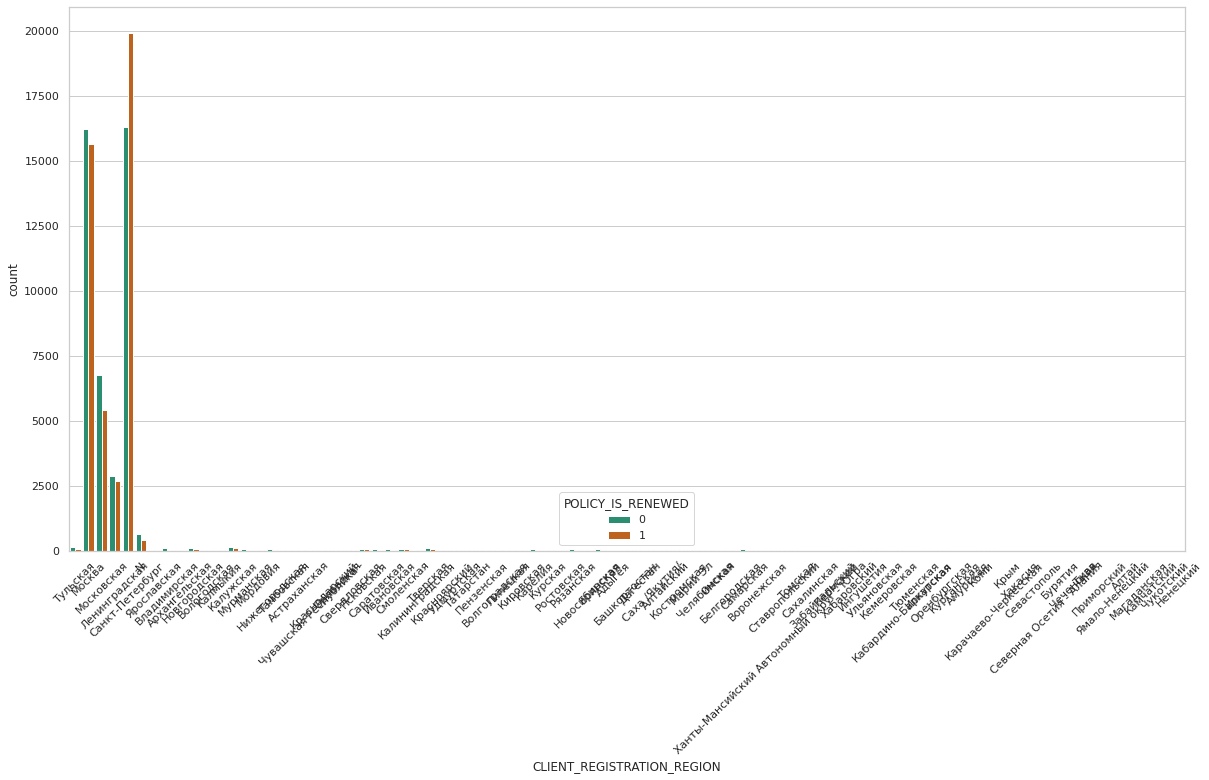

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data['CLIENT_REGISTRATION_REGION'], hue=data['POLICY_IS_RENEWED'], ax=ax)
plt.xticks(rotation=45)

In [ ]:
data.drop('CLIENT_REGISTRATION_REGION', axis=1, inplace=True)

### POLICY_PRICE_CHANGE

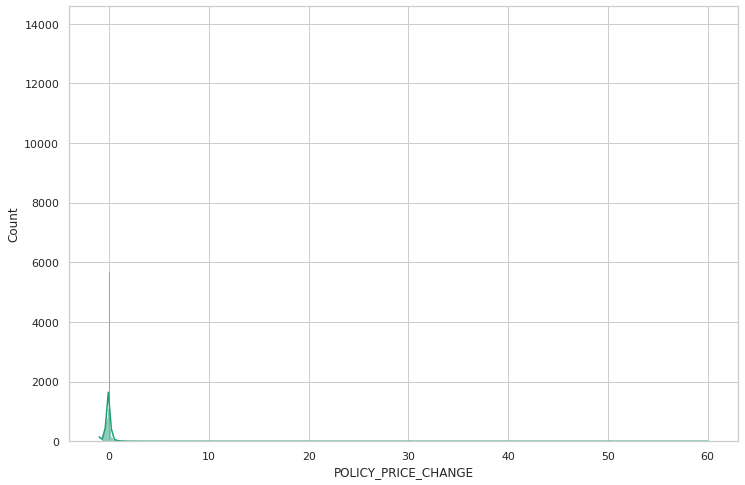

In [ ]:
sns.histplot(data['POLICY_PRICE_CHANGE'], kde=True)

In [ ]:
low = .001
high = .99
quant_df = data['POLICY_PRICE_CHANGE'].quantile([low, high])
print(quant_df)

0.001   -1.00
0.990    1.14
Name: POLICY_PRICE_CHANGE, dtype: float64


In [ ]:
data = data[(data['POLICY_PRICE_CHANGE'] >= -1.0) & (data['POLICY_PRICE_CHANGE'] <= 1.14)]

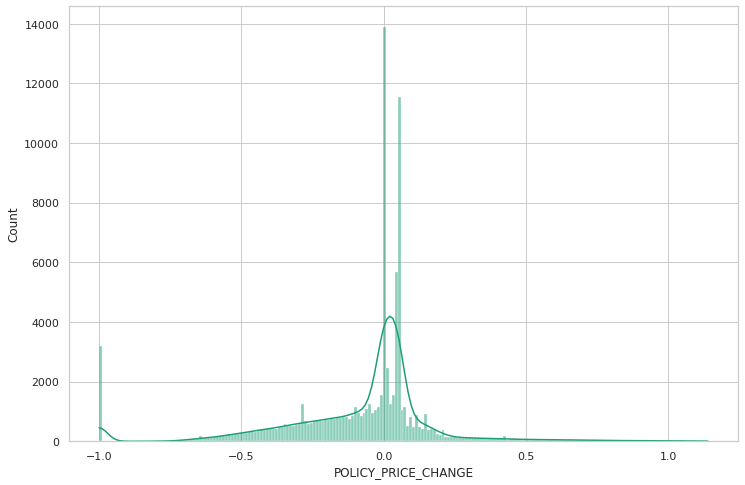

In [ ]:
sns.histplot(data['POLICY_PRICE_CHANGE'], kde=True)

In [ ]:
num_cols.append('POLICY_PRICE_CHANGE')

# Final Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89243 entries, 1 to 96605
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POLICY_BEGIN_MONTH             89243 non-null  int64  
 1   POLICY_END_MONTH               89243 non-null  int64  
 2   POLICY_IS_RENEWED              89243 non-null  int64  
 3   POLICY_SALES_CHANNEL           89243 non-null  int64  
 4   POLICY_SALES_CHANNEL_GROUP     89243 non-null  int64  
 5   POLICY_BRANCH                  89243 non-null  int64  
 6   POLICY_MIN_AGE                 89243 non-null  int64  
 7   POLICY_MIN_DRIVING_EXPERIENCE  89243 non-null  int64  
 8   VEHICLE_ENGINE_POWER           89243 non-null  float64
 9   VEHICLE_IN_CREDIT              89243 non-null  int64  
 10  VEHICLE_SUM_INSURED            89243 non-null  float64
 11  INSURER_GENDER                 89243 non-null  int64  
 12  POLICY_CLM_N                   89243 non-null 

In [ ]:
cat_cols

['POLICY_BEGIN_MONTH',
 'POLICY_END_MONTH',
 'POLICY_SALES_CHANNEL',
 'POLICY_SALES_CHANNEL_GROUP',
 'POLICY_BRANCH',
 'VEHICLE_IN_CREDIT',
 'INSURER_GENDER',
 'POLICY_CLM_N',
 'POLICY_CLM_GLT_N',
 'POLICY_PRV_CLM_N',
 'CLIENT_HAS_DAGO',
 'CLIENT_HAS_OSAGO',
 'POLICY_HAS_COMPLAINTS',
 'POLICY_YEARS_RENEWED_N']

In [ ]:
num_cols

['POLICY_MIN_AGE',
 'POLICY_MIN_DRIVING_EXPERIENCE',
 'VEHICLE_ENGINE_POWER',
 'VEHICLE_SUM_INSURED',
 'POLICY_DEDUCT_VALUE',
 'POLICY_PRICE_CHANGE']

In [ ]:
len(num_cols) + len(cat_cols)

20

In [ ]:
data.to_csv('data/data.csv')